In [1]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import *

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
Andro = pd.read_csv("../../2_Only_Permissions_Datasets/Permission_Androcrawl.csv")

In [5]:
Andro.head()

,ACCESS_SUPERUSER,BLUETOOTH_PRIVILEGED,BRICK,CHANGE_COMPONENT_ENABLED_STATE,CLEAR_APP_USER_DATA,DELETE_CACHE_FILES,DELETE_PACKAGES,DISABLE_KEYGUARD,FACTORY_TEST,INSTALL_PACKAGES,INJECT_EVENTS,INTERNAL_SYSTEM_WINDOW,KILL_BACKGROUND_PROCESSES,MASTER_CLEAR,MODIFY_PHONE_STATE,MOUNT_FORMAT_FILESYSTEM,MOUNT_UNMOUNT_FILESYSTEM,PROCESS_OUTGOING_CALLS,READ_LOGS,REBOOT,RECEIVE_BOOT_COMPLETED,STATUS_BAR,WRITE_EXTERNAL_STORAGE,WRITE_HISTORY_BOOKMARKS,WRITE_PROFILE,WRITE_SECURE_SETTINGS,ACCESS_SURFACE_FLINGER,ACCOUNT_MANAGER,ADD_VOICEMAIL,CONTROL_LOCATION_UPDATES,DEVICE_POWER,EXPAND_STATUS_BAR,FLASHLIGHT,FORCE_BACK,GET_PACKAGE_SIZE,GET_TOP_ACTIVITY_INFO,GLOBAL_SEARCH,INSTALL_SHORTCUT,MANAGE_DOCUMENTS,MEDIA_CONTENT_CONTROL,MODIFY_AUDIO_SETTINGS,READ_USER_DICTIONARY,REORDER_TASKS,SEND_RESPOND_VIA_MESSAGE,SET_ALARM,SET_ANIMATION_SCALE,SET_ORIENTATION,SET_POINTER_SPEED,SET_TIME,SET_TIME_ZONE,SET_WALLPAPER,UNINSTALL_SHORTCUT,VIBRATE,WAKE_LOCK,WRITE_CALENDAR,WRITE_CALL_LOG,WRITE_CONTACTS,WRITE_USER_DICTIONARY,class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Separação dos dados

### Separação de conjuntos de treino, teste e validação

In [6]:
train, test = train_test_split(Andro,test_size = 0.2,stratify=Andro["class"],random_state=42)

In [7]:
X_TRAIN = train.drop("class", axis=1)
Y_TRAIN = train["class"]
x_train, x_validation, y_train, y_validation = train_test_split(X_TRAIN, Y_TRAIN, test_size = 0.375, stratify = Y_TRAIN, random_state=42)

In [8]:
# Balanceamento de dados de treino
rus = RandomUnderSampler()
x_train_balanced, y_train_balanced = rus.fit_resample(x_train, y_train)
x_train_balanced = pd.DataFrame(x_train_balanced)

In [9]:
x_test = test.drop("class", axis=1)
y_test = test["class"]

In [10]:
D_RandomForest = RandomForestClassifier()
B_RandomForest = RandomForestClassifier()

# HIPERPARÂMETROS PADRÕES

### Treino Desbalanceado

In [11]:
D_RandomForest.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
print("Treino desbalanceado")
print("Curva ROC >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="roc_auc", cv = 5).mean())*100,"%")
print("Acurácia >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="accuracy", cv = 5).mean())*100,"%")
print("Precisão >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="precision", cv = 5).mean())*100,"%")
print("F1-Score >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="f1", cv = 5).mean())*100,"%")
print("Recall >> ", (cross_val_score(D_RandomForest, x_validation, y_validation, scoring="recall", cv = 5).mean())*100,"%")

Treino desbalanceado
Curva ROC >>  57.16547056784875 %
Acurácia >>  85.45286316438778 %
Precisão >>  31.570203381524138 %
F1-Score >>  2.213811207483831 %
Recall >>  1.0036253683219944 %


In [13]:
print("Treino desbalanceado")
print("Curva ROC >> ",roc_auc_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")
print("Acurácia >> ", accuracy_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")
print("Precisão >> ", precision_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")
print("F1-Score >> ", f1_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")
print("Recall >> ", recall_score(y_validation,D_RandomForest.predict(x_validation))*100,"%")

Treino desbalanceado
Curva ROC >>  50.06995932806196 %
Acurácia >>  85.50426647476097 %
Precisão >>  20.76923076923077 %
F1-Score >>  0.7601351351351351 %
Recall >>  0.3871522798967594 %


### Treino Balanceado

In [14]:
B_RandomForest.fit(x_train_balanced,y_train_balanced)

RandomForestClassifier()

In [15]:
print("Treino balanceado")
print("Curva ROC >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="roc_auc", cv = 5).mean())*100,"%")
print("Acurácia >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="accuracy", cv = 5).mean())*100,"%")
print("Precisão >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="precision", cv = 5).mean())*100,"%")
print("F1-Score >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="f1", cv = 5).mean())*100,"%")
print("Recall >> ", (cross_val_score(B_RandomForest, x_validation, y_validation, scoring="recall", cv = 5).mean())*100,"%")

Treino balanceado
Curva ROC >>  57.11884790833924 %
Acurácia >>  85.4775367533669 %
Precisão >>  32.78393011333333 %
F1-Score >>  2.2416620149684396 %
Recall >>  1.1614240241074139 %


In [16]:
print("Treino balanceado")
print("Curva ROC >> ",roc_auc_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")
print("Acurácia >> ", accuracy_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")
print("Precisão >> ", precision_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")
print("F1-Score >> ", f1_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")
print("Recall >> ", recall_score(y_validation,B_RandomForest.predict(x_validation))*100,"%")

Treino balanceado
Curva ROC >>  55.59628366412234 %
Acurácia >>  68.33144854528632 %
Precisão >>  19.222903885480573 %
F1-Score >>  25.471789412561698 %
Recall >>  37.74017780326929 %


# TESTANDO HIPERPARÂMETROS

In [17]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

D_RS = RandomizedSearchCV(D_RandomForest, random_grid, random_state=42, scoring="roc_auc",cv = 5, n_iter=100, n_jobs=-1, verbose=2).fit(x_train,y_train)
B_RS = RandomizedSearchCV(B_RandomForest, random_grid, random_state=42, scoring="roc_auc",cv = 5, n_iter = 100, n_jobs=-1, verbose=2).fit(x_train_balanced,y_train_balanced)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 1.7min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 1.8min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 1.8min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 1.8min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 1.9min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 4.2min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; to

In [18]:
D_RS.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [19]:
B_RS.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

# HIPERPARÂMETROS OTIMIZADOS

In [20]:
OD_RandomForest = RandomForestClassifier(**D_RS.best_params_)
OB_RandomForest = RandomForestClassifier(**B_RS.best_params_)

In [21]:
OD_RandomForest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=800)

In [22]:
print("Treino desbalanceado")
print("Curva ROC >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="roc_auc", cv = 5).mean())*100,"%")
print("Acurácia >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="accuracy", cv = 5).mean())*100,"%")
print("Precisão >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="precision", cv = 5).mean())*100,"%")
print("F1-Score >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="f1", cv = 5).mean())*100,"%")
print("Recall >> ", (cross_val_score(OD_RandomForest, x_validation, y_validation, scoring="recall", cv = 5).mean())*100,"%")

Treino desbalanceado
Curva ROC >>  57.6565672214165 %
Acurácia >>  85.66053253829547 %


/home/overycall/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/overycall/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/overycall/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/overycall/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: Un

Precisão >>  0.0 %
F1-Score >>  0.0 %
Recall >>  0.0 %


In [23]:
print("Treino desbalanceado")
print("Curva ROC >> ",roc_auc_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")
print("Acurácia >> ", accuracy_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")
print("Precisão >> ", precision_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")
print("F1-Score >> ", f1_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")
print("Recall >> ", recall_score(y_validation,OD_RandomForest.predict(x_validation))*100,"%")

Treino desbalanceado
Curva ROC >>  50.0 %
Acurácia >>  85.66053253829547 %


/home/overycall/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precisão >>  0.0 %
F1-Score >>  0.0 %
Recall >>  0.0 %


In [24]:
OB_RandomForest.fit(x_train_balanced, y_train_balanced)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1000)

In [25]:
print("Treino balanceado")
print("Curva ROC >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="roc_auc", cv = 5).mean())*100,"%")
print("Acurácia >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="accuracy", cv = 5).mean())*100,"%")
print("Precisão >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="precision", cv = 5).mean())*100,"%")
print("F1-Score >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="f1", cv = 5).mean())*100,"%")
print("Recall >> ", (cross_val_score(OB_RandomForest, x_validation, y_validation, scoring="recall", cv = 5).mean())*100,"%")

Treino balanceado
Curva ROC >>  57.553071504121434 %
Acurácia >>  85.65847640588053 %


/home/overycall/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/overycall/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/overycall/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/overycall/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: Un

Precisão >>  0.0 %
F1-Score >>  0.0 %
Recall >>  0.0 %


In [26]:
print("Curva ROC >> ",roc_auc_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")
print("Acurácia >> ", accuracy_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")
print("Precisão >> ", precision_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")
print("F1-Score >> ", f1_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")
print("Recall >> ", recall_score(y_validation,OB_RandomForest.predict(x_validation))*100,"%")

Curva ROC >>  55.63481829972812 %
Acurácia >>  68.04975840444123 %
Precisão >>  19.183996546017127 %
F1-Score >>  25.547410282209764 %
Recall >>  38.227702896472614 %


# HIPERPARÂMETROS PADRÕES X HIPERPARÂMETROS OTIMIZADOS

### Desbalanceado

/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

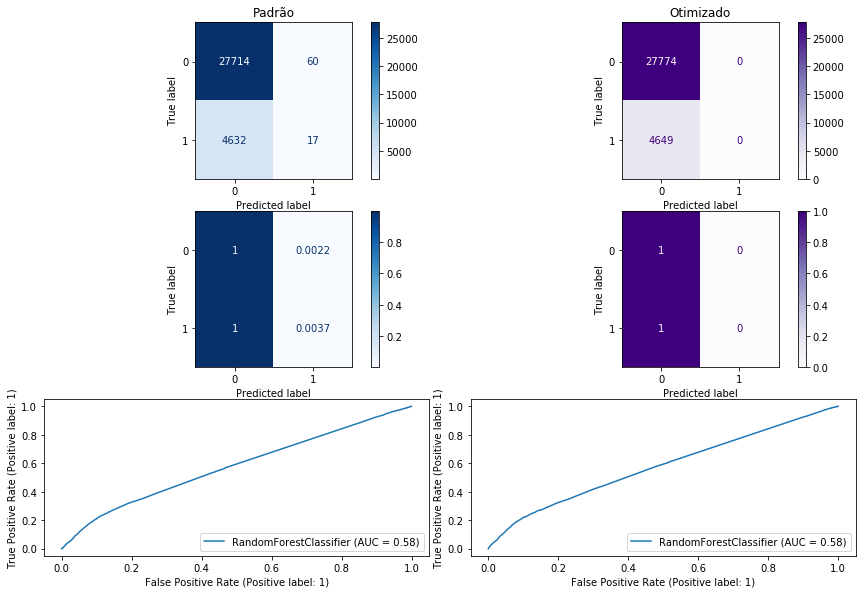

In [27]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,8))
plt.tight_layout()
ax1.set(title="Padrão")
ax2.set(title="Otimizado")
plot_confusion_matrix(D_RandomForest, x_test, y_test,ax=ax1, cmap = "Blues", values_format="d")
plot_confusion_matrix(OD_RandomForest, x_test, y_test, ax=ax2, cmap= "Purples", values_format="d")
plot_confusion_matrix(D_RandomForest, x_test, y_test,ax=ax3, cmap = "Blues", normalize = "true")
plot_confusion_matrix(OD_RandomForest, x_test, y_test, ax=ax4, cmap= "Purples", normalize = "true")
plot_roc_curve(D_RandomForest,x_test, y_test, ax=ax5)
plot_roc_curve(OD_RandomForest,x_test, y_test, ax=ax6)

In [28]:
print("PADRÃO - ROC_AUC>>",roc_auc_score(y_test, D_RandomForest.predict(x_test))*100, "%")

PADRÃO - ROC_AUC>> 50.07482032828566 %


In [29]:
print("OTIMIZADO - ROC_AUC>>",roc_auc_score(y_test, OD_RandomForest.predict(x_test))*100, "%")

OTIMIZADO - ROC_AUC>> 50.0 %


### Balanceado

/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

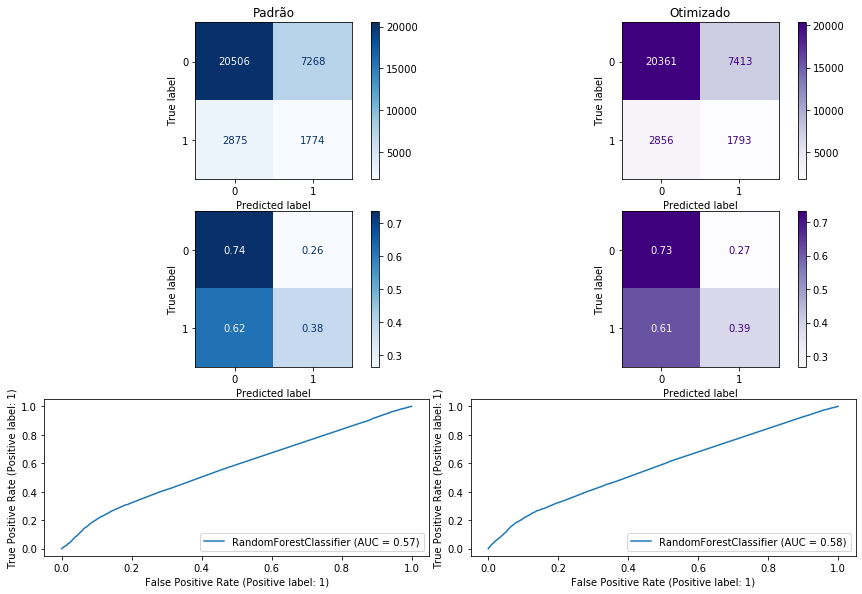

In [30]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,8))
plt.tight_layout()
ax1.set(title="Padrão")
ax2.set(title="Otimizado")
plot_confusion_matrix(B_RandomForest, x_test, y_test,ax=ax1, cmap = "Blues", values_format="d")
plot_confusion_matrix(OB_RandomForest, x_test, y_test, ax=ax2, cmap= "Purples", values_format="d")
plot_confusion_matrix(B_RandomForest, x_test, y_test,ax=ax3, cmap = "Blues", normalize = "true")
plot_confusion_matrix(OB_RandomForest, x_test, y_test, ax=ax4, cmap= "Purples", normalize = "true")
plot_roc_curve(B_RandomForest,x_test, y_test, ax=ax5)
plot_roc_curve(OB_RandomForest,x_test, y_test, ax=ax6)

In [31]:
print("PADRÃO - ROC_AUC >>",roc_auc_score(y_test, B_RandomForest.predict(x_test))*100, "%")

PADRÃO - ROC_AUC >> 55.99519245953219 %


In [32]:
print("OTIMIZADO - ROC_AUC >>",roc_auc_score(y_test, OB_RandomForest.predict(x_test))*100, "%")

OTIMIZADO - ROC_AUC >> 55.9385019791386 %


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2d8ac86b-a893-46e4-9843-c480ae878176' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>